In [4]:
!pip install fastai==1.0.61

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fastai-1.0.61-py3-none-any.whl (239 kB)
  Attempting uninstall: fastai
    Found existing installation: fastai 2.7.12
    Uninstalling fastai-2.7.12:
      Successfully uninstalled fastai-2.7.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastbook 0.0.29 requires fastai>=2.6, but you have fastai 1.0.61 which is incompatible.


In [5]:
from glob import glob
from fastai import *

In [6]:

!pip install fastbook

from fastai.vision.all import * 
from fastbook import * 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fastai-2.7.12-py3-none-any.whl (233 kB)
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [7]:
path = Path('data')


In [8]:
from zipfile import ZipFile
  


In [9]:
!pip install patool

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 KB 2.7 MB/s eta 0:00:00


In [9]:
path.ls()

(#2) [Path('data/test'),Path('data/train')]

In [10]:
print(path)

data


In [11]:
glob.glob(str(path/'*'))

 

['data/test', 'data/train']

In [14]:
!pip install "torch==1.4" "torchvision==0.5.0"


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement torch==1.4 (from versions: 1.7.1, 1.8.0, 1.8.1, 1.9.0, 1.9.1, 1.10.0, 1.10.1, 1.10.2, 1.11.0, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 2.0.0)
ERROR: No matching distribution found for torch==1.4


In [12]:
dls = ImageDataLoaders.from_folder(path, 
                                  train='train', 
                                  valid='test',
                                  num_workers=12,
                                  item_tfms = Resize(244),
                                  ds_tfms=aug_transforms(), 
                                  size=224)

In [13]:
learn =cnn_learner(dls, models.resnet34, metrics=accuracy)
learn.fit_one_cycle(5)

/usr/local/lib/python3.9/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy,time
0,1.779088,0.390034,0.862745,16:24
1,1.065078,0.246704,0.921569,16:06
2,0.721459,0.146066,0.944444,15:38


epoch,train_loss,valid_loss,accuracy,time
0,1.779088,0.390034,0.862745,16:24
1,1.065078,0.246704,0.921569,16:06
2,0.721459,0.146066,0.944444,15:38
3,0.527923,0.122442,0.964052,15:29
4,0.425652,0.125033,0.967320,15:25


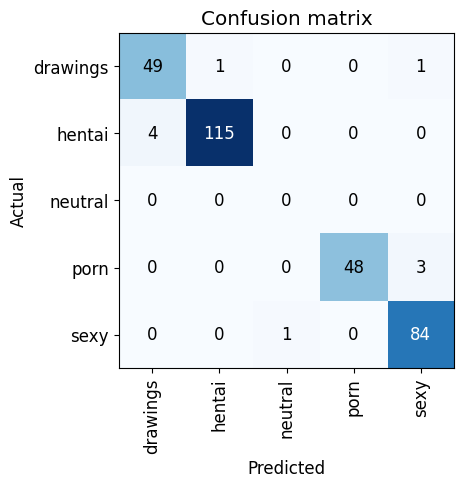

In [14]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()